
# Shared rides with pricing - Delft 

 ### Choice Function (Deterministic):
 `pool_price.py`
 * Pickup Distance: distance from driver initial position to the first pickup point
 * Travel Distance: distance from driver's initial position to the drop off point of the last passenger
 * Operating Cost: This include all the expenses
 * Profit: Driver revenue to serve the request
            
 
  ### KPI:
   
   * Profit of Individual driver
   * Profit of all the drivers
   * No.of rejected rides
   * U - PAX (Utility) 
  
   ### TBD- Choice Function (Probablistic):
  
  * choice logic to be applied inside `pool_price.py` 
  * P(R)= exp(beta * Profit_R)/ sum_all the rides( exp(beta * Profit_R)
 



-------------------------------------------------------------------------------------------------------

# Pricing and Driver Earnings for a Two-Sided Mobility Platform: A Case of Amsterdam, the Netherlands

or 

# The Effects of Profit-Based Pricing on Driver Earnings and Performance of Two-Sided Mobility Platforms

# Abstract  

In this paper, we investigate how the  pricing of ride-pooling affects driver earnings. We also examine how profit-based setting affects these performance indicators. To this end, we applied a matching algorithm  to the case of ride-pooling and give a choice set to the driver for the case of Amsterdam, the Netherlands. For our simulation, we utilize an agent-based simulator reproducing the transport systems for two-sided mobility platforms (like Uber and Lyft) and applied three state-of-the-art pricing strategies such as <strong>profit maximization</strong>,  <strong>solo ride-hailing</strong>, and <strong>nearest pickup ride-pooling</strong>. We find that the profit maximization pricing strategy outperforms the other and traveler utility can be further improved by $\%X$ while reducing the total cost to serve the pooled rides. While offering a discount for profit maximization travel time is significantly higher $\%X$  than for private rides. 

-------------------------------------------------------------------------------------------------------

## Mode of Simulation 

Three type of simulation 

<strong>1. Profit maximization</strong> 

<strong>2. Solo ride-hailing</strong>

<strong>3. Nearest pickup ride-pooling</strong>

## Load ExMAS and MaaSSim


In [50]:
%load_ext autoreload
%autoreload 2
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand, generate_demand, generate_vehicles, initialize_df  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate
from MaaSSim.visualizations import plot_veh
from MaaSSim.shared import prep_shared_rides
import logging
import matplotlib.pyplot as plt

import pandas as pd
import ExMAS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Delft, Netherlands

In [51]:
params = get_config('../../data/config/delft.json')  # load configuration

params.times.pickup_patience = 3600 # 1 hour of simulation
params.simTime = 1 # 6 minutes hour of simulation
params.nP = 100 # reuqests (and passengers)
params.nV = 20 # vehicles



## Parameters for ExMAS

In [52]:
params.t0 = pd.Timestamp.now()
params.shareability.avg_speed = params.speeds.ride
params.shareability.shared_discount = 0.25
params.shareability.delay_value = 1
params.shareability.WtS = 1.3
params.shareability.price = 1.5 #eur/km
params.shareability.VoT = 0.0035 #eur/s
params.shareability.matching_obj = 'u_veh' #minimize VHT for vehicles
params.shareability.pax_delay = 0
params.shareability.horizon = 600
params.shareability.max_degree = 4
params.shareability.nP = params.nP
params.shareability.share = 1
params.shareability.without_matching = True
params.shareability.operating_cost = 0.5
params.shareability.comm_rate = 0.2

inData = load_G(inData, params)  # load network graph 

inData = generate_demand(inData, params, avg_speed = False)
inData.vehicles = generate_vehicles(inData,params.nV)
inData.vehicles.platform = inData.vehicles.apply(lambda x: 0, axis = 1)
inData.passengers.platforms = inData.passengers.apply(lambda x: [0], axis = 1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0], axis = 1) 
inData.platforms = initialize_df(inData.platforms)
inData.platforms.loc[0]=[1,'Uber',30]
params.shareability.share = 1
params.shareability.without_matching = True



# Strategy 1: 
# params.kpi = 1 (Profit Maximazation)


### Profit Mazimization - Begin 

In [53]:
inData = ExMAS.main(inData, params.shareability, plot=False) # create shareability graph (ExMAS) 

29-03-23 13:44:02-INFO-Initializing pairwise trip shareability between 100 and 100 trips.
29-03-23 13:44:02-INFO-creating combinations
29-03-23 13:44:02-INFO-9900	 nR*(nR-1)
29-03-23 13:44:03-INFO-Reduction of feasible pairs by 99.26%
29-03-23 13:44:03-INFO-Degree 2 	Completed
29-03-23 13:44:03-INFO-trips to extend at degree 2 : 172
29-03-23 13:44:03-INFO-At degree 2 feasible extensions found out of 41 searched
29-03-23 13:44:03-INFO-Degree 3 	Completed
29-03-23 13:44:03-INFO-trips to extend at degree 3 : 41
29-03-23 13:44:03-INFO-At degree 3 feasible extensions found out of 9 searched
29-03-23 13:44:03-INFO-Degree 4 	Completed
29-03-23 13:44:03-INFO-Max degree reached 4
29-03-23 13:44:03-INFO-Trips still possible to extend at degree 4 : 9


In [54]:
inData = prep_shared_rides(inData, params.shareability) # prepare schedules

29-03-23 13:44:03-INFO-Matching 100 trips to 322 rides in order to min u_veh
29-03-23 13:44:03-INFO-Problem solution: Optimal. 
Total costs for single trips:         25,582 
reduced by matching to:               21,645


In [55]:
inData.sblts.rides

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,...,row,selected,nodes,req_id,sim_schedule,ttrav,dist,fare,commission,driver_revenue
0,[0],5.451000,294,1,[5.451],"[0, 294]",[0],[0],1,0,...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1552650605, 1436427139]","[None, 0, 0]",node time req_id od 0 ...,294,2.94,4.422000,0.884400,3.5376
1,[1],4.070000,220,1,[4.07],"[15, 220]",[1],[1],1,1,...,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44796534, 5715066940]","[None, 1, 1]",node time req_id od 0 ...,220,2.20,3.300000,0.660000,2.6400
2,[2],2.989000,161,1,[2.989],"[51, 161]",[2],[2],1,2,...,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44773463, 1576745685]","[None, 2, 2]",node time req_id od 0 ...,161,1.61,2.425500,0.485100,1.9404
3,[3],5.241500,283,1,[5.2415],"[110, 283]",[3],[3],1,3,...,"[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 1518087736, 1552651328]","[None, 3, 3]",node time req_id od 0 ...,283,2.83,4.251000,0.850200,3.4008
4,[4],10.406000,562,1,[10.406],"[136, 562]",[4],[4],1,4,...,"[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44850701, 1448535752]","[None, 4, 4]",node time req_id od 0 ...,562,5.62,8.439000,1.687800,6.7512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,"[59, 61, 60, 67]",21.091275,731,41,"[6.7557, 8.82475, 3.8008, 1.710025]","[2017.0, 36, 137, 45, 106, 104, 130, 173]","[59, 61, 60, 67]","[67, 60, 59, 61]",4,317,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44731083, 1667696847, 44759037, 1571087...","[None, 59, 61, 60, 67, 67, 60, 59, 61]",node time req_id od 0 ...,731,7.31,13.433625,2.686725,10.7469
318,"[16, 12, 15, 26]",19.573825,627,42,"[6.302725000000001, 5.002225, 5.38395000000000...","[341.5, 78, 185, 70, 87, 10, 87, 110]","[16, 12, 15, 26]","[12, 16, 26, 15]",4,318,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1,"[None, 44835282, 4552156190, 3669218091, 39054...","[None, 16, 12, 15, 26, 12, 16, 26, 15]",node time req_id od 0 ...,627,6.27,12.821625,2.564325,10.2573
319,"[16, 12, 15, 20]",25.941775,941,40,"[6.552975, 5.070475, 5.3885000000000005, 8.929...","[341.5, 78, 185, 17, 175, 10, 168, 308]","[16, 12, 15, 20]","[12, 16, 15, 20]",4,319,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44835282, 4552156190, 3669218091, 31511...","[None, 16, 12, 15, 20, 12, 16, 15, 20]",node time req_id od 0 ...,941,9.41,16.282125,3.256425,13.0257
320,"[16, 12, 20, 26]",22.660150,824,42,"[6.3573249999999994, 5.056825, 8.379275, 2.866...","[341.5, 78, 180, 87, 87, 10, 87, 295]","[16, 12, 20, 26]","[12, 16, 26, 20]",4,320,...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[None, 44835282, 4552156190, 315119898, 390542...","[None, 16, 12, 20, 26, 12, 16, 26, 20]",node time req_id od 0 ...,824,8.24,14.638500,2.927700,11.7108


In [56]:
params.kpi = 1

In [57]:
sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate

29-03-23 13:44:07-INFO-Matching 100 trips to 322 rides in order to min u_veh
29-03-23 13:44:07-INFO-Problem solution: Optimal. 
Total costs for single trips:         25,582 
reduced by matching to:               21,645
0.5
29-03-23 13:44:09-CRITICAL-this is request 0 with [0, 105, 158] available rides.
29-03-23 13:44:09-CRITICAL-ride 0 available [1]
29-03-23 13:44:09-CRITICAL-ride 105 available [1, 0]
29-03-23 13:44:09-CRITICAL-ride 158 available [1, 0]
29-03-23 13:44:09-CRITICAL-this is reuqest 0 with [0, 105, 158] still available rides.
Profit Maximization
29-03-23 13:44:09-CRITICAL-vehicle 1 has 3 choices
0.5
0.5
29-03-23 13:44:09-CRITICAL-this is request 2 with [2, 160] available rides.
29-03-23 13:44:09-CRITICAL-ride 2 available [1]
29-03-23 13:44:09-CRITICAL-ride 160 available [1, 0]
29-03-23 13:44:09-CRITICAL-this is reuqest 2 with [2, 160] still available rides.
Profit Maximization
29-03-23 13:44:09-CRITICAL-vehicle 19 has 2 choices
0.5
29-03-23 13:44:09-CRITICAL-this is reques

In [58]:
df = sim.res[0].veh_exp

In [59]:
import seaborn as sns

In [60]:
df

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,False,0,0,2331.0,30.0,0,215.0,0,...,0,0,7005.0,686.0,0,442.0,335.0,5542.0,9.722,3.1992
2,6.0,0.0,False,0,0,1681.0,60.0,0,175.0,0,...,0,0,7267.0,1116.0,0,320.0,415.0,5416.0,15.570,5.3001
3,6.0,0.0,False,0,0,1512.0,60.0,0,147.0,0,...,0,0,7361.0,1059.0,0,480.0,387.0,5435.0,12.874,4.6287
4,7.0,0.0,False,0,0,1376.0,75.0,0,217.0,0,...,0,0,7095.0,1141.0,0,685.0,502.0,4767.0,18.355,4.6548
5,8.0,0.0,False,0,0,1180.0,75.0,0,148.0,0,...,0,0,7281.0,1137.0,0,738.0,463.0,4943.0,17.894,3.1488
6,0.0,0.0,False,0,0,136.0,0.0,0,0.0,0,...,0,0,10663.0,0.0,0,0.0,0.0,10663.0,0.000,0.0000
7,7.0,0.0,False,0,0,1391.0,75.0,0,108.0,0,...,0,0,7038.0,1178.0,0,799.0,393.0,4668.0,16.187,4.8924
8,4.0,0.0,False,0,0,1547.0,16.0,0,127.0,0,...,0,0,7602.0,852.0,0,535.0,263.0,5952.0,16.519,4.6668
9,4.0,0.0,False,0,0,763.0,15.0,0,207.0,0,...,0,0,9077.0,324.0,0,293.0,342.0,8118.0,11.397,7.7643


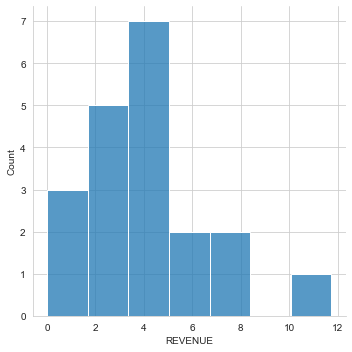

In [65]:
sns.displot(df.REVENUE)

In [10]:
sim.res[0].veh_exp['REVENUE'].to_list()

[4.7376, 2.07, 3.0276000000000005, 2.0460000000000003, 1.302]

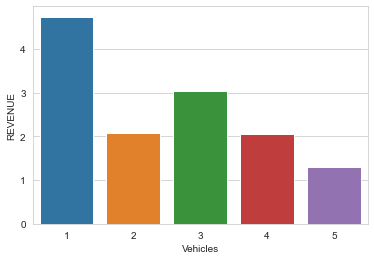

In [11]:
import seaborn as sns
sns.set_style("whitegrid")
sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total Revenue of all the driver 

In [12]:
sim.res[0].all_kpi # All driver revenue 

13.1832

# Strategy 2: 

# params.kpi = 2 (Pooled Ride - Nearest) 


In [13]:
params.kpi = 2

In [14]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

27-03-23 09:24:43-WARNING-Setting up 1h simulation at 2023-03-27 08:51:43 for 5 vehicles and 500 passengers in Delft, Netherlands
0.5
27-03-23 09:24:44-CRITICAL-this is request 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] available rides.
27-03-23 09:24:44-CRITICAL-ride 0 available [1]
27-03-23 09:24:44-CRITICAL-ride 902 available [0, 1]
27-03-23 09:24:44-CRITICAL-ride 2444 available [1, 0]
27-03-23 09:24:44-CRITICAL-ride 2559 available [1, 0]
27-03-23 09:24:44-CRITICAL-ride 3335 available [1, 0]
27-03-23 09:24:44-CRITICAL-ride 4457 available [0, 1]
27-03-23 09:24:44-CRITICAL-ride 6295 available [0, 1, 0]
27-03-23 09:24:44-CRITICAL-this is reuqest 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] still available rides.
Pooled rides
27-03-23 09:24:44-CRITICAL-vehicle 1 has 7 choices
0.5
27-03-23 09:24:44-CRITICAL-this is request 1 with [1, 1262, 1263, 1319, 2986, 3542, 3566, 5009, 5010, 5891] available rides.
27-03-23 09:24:44-CRITICAL-ride 1 available [1]
27-03-23 09:24:44-CRITICAL-ride 1

In [15]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,13,0.0,False,0,0,50.0,15.0,0,154.0,0,...,0,0,6538.0,2504.0,0,1148.0,559.0,2327.0,52.765,5.4060
2,5,0.0,False,0,0,41.0,15.0,0,129.0,0,...,0,0,9425.0,588.0,0,451.0,294.0,8092.0,9.006,3.8880
3,13,0.0,False,0,0,74.0,15.0,0,176.0,0,...,0,0,6695.0,1939.0,0,1510.0,581.0,2665.0,42.929,1.2192
4,3,0.0,False,0,0,23.0,15.0,0,76.0,0,...,0,0,9657.0,468.0,0,470.0,181.0,8538.0,12.749,5.2452
5,14,0.0,False,0,0,72.0,15.0,0,247.0,0,...,0,0,7089.0,1998.0,0,958.0,682.0,3451.0,38.690,2.4876


In [16]:
sim.res[0].veh_exp['REVENUE'].to_list()

[5.406000000000001,
 3.8880000000000003,
 1.2192,
 5.2452000000000005,
 2.4875999999999996]

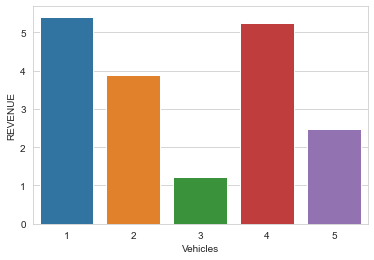

In [17]:
import seaborn as sns
sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver

In [18]:
sim.res[0].all_kpi # All driver revenue 

18.246000000000002

# Strategy 3: 
# params.kpi = 3 (Private ride)


In [19]:
params.kpi = 3

In [20]:
sim = simulate(params = params, inData = inData, logger_level = logging.WARNING) # simulate

27-03-23 09:25:51-WARNING-Setting up 1h simulation at 2023-03-27 08:51:43 for 5 vehicles and 500 passengers in Delft, Netherlands
0.5
27-03-23 09:25:52-CRITICAL-this is request 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] available rides.
27-03-23 09:25:52-CRITICAL-ride 0 available [1]
27-03-23 09:25:52-CRITICAL-ride 902 available [0, 1]
27-03-23 09:25:52-CRITICAL-ride 2444 available [1, 0]
27-03-23 09:25:52-CRITICAL-ride 2559 available [1, 0]
27-03-23 09:25:52-CRITICAL-ride 3335 available [1, 0]
27-03-23 09:25:52-CRITICAL-ride 4457 available [0, 1]
27-03-23 09:25:52-CRITICAL-ride 6295 available [0, 1, 0]
27-03-23 09:25:52-CRITICAL-this is reuqest 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] still available rides.
private rides
27-03-23 09:25:52-CRITICAL-vehicle 1 has 7 choices
0.5
27-03-23 09:25:52-CRITICAL-this is request 1 with [1, 1262, 1263, 1319, 2986, 3542, 3566, 5009, 5010, 5891] available rides.
27-03-23 09:25:52-CRITICAL-ride 1 available [1]
27-03-23 09:25:52-CRITICAL-ride 

In [21]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,...,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT,TRAVEL,WAIT,CRUISE,OPERATIONS,IDLE,PAX_KM,REVENUE
veh,,,,,,,,,,,,,,,,,,,,,
1,13,0.0,False,0,0,50.0,15.0,0,154.0,0,...,0,0,6502.0,2504.0,0.0,1184.0,559.0,2255.0,52.765,5.4060
2,5,0.0,False,0,0,41.0,15.0,0,129.0,0,...,0,0,9332.0,591.0,0.0,541.0,294.0,7906.0,9.030,0.6024
3,11,0.0,False,0,0,52.0,15.0,0,107.0,0,...,0,0,7851.0,1486.0,0.0,965.0,445.0,4955.0,29.486,2.0700
4,7,0.0,False,0,0,54.0,15.0,0,108.0,0,...,0,0,0.0,983.0,3600.0,388.0,333.0,-5304.0,19.245,3.4956
5,3,0.0,False,0,0,23.0,15.0,0,76.0,0,...,0,0,9376.0,468.0,0.0,751.0,181.0,7976.0,12.749,5.2452


In [22]:
sim.res[0].veh_exp['REVENUE'].to_list()

[5.406000000000001, 0.6024, 2.07, 3.4955999999999996, 5.2452000000000005]

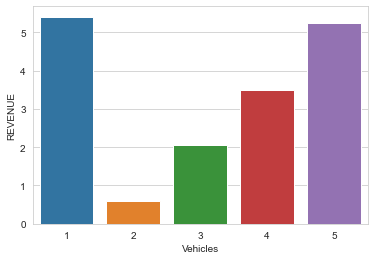

In [23]:
import seaborn as sns

sns.set_style("whitegrid")

sim.res[0].veh_exp['Vehicles'] = sim.res[0].veh_exp.index

ax =sns.barplot(data=sim.res[0].veh_exp, x="Vehicles", y="REVENUE")

#ax.set(xlabel=None)
#for i in ax.containers:
    #ax.bar_label(i,)

# Total revenue of all the driver 

In [24]:
sim.res[0].all_kpi # All driver revenue 

16.819200000000002

# All in one Simulation  

In [25]:
responses = []
avg_kpi = []
idle_time = []

for i in range(1, 4):
    params.kpi = i
    sim = simulate(params = params, inData = inData, logger_level = logging.CRITICAL) # simulate
    sim.res[0].veh_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/veh{}.csv'.format(i))
    sim.res[0].pax_kpi.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/Simulation/pax{}.csv'.format(i))
    #driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)['Vehicles'] = sim.res[0].veh_exp.index
    #sim.res[0].veh_exp['ds'] = f"{i}"
    
    #responses.append(sim.res[0].veh_exp)
     
   # vehicles = sim.res[0].veh_exp.loc[sim.res[0].veh_exp["nRIDES"] > 0]
    #no_of_veh = len(vehicles)
    
    #avg_kpi.append(sim.res[0].all_kpi/no_of_veh)
    #idle_time.append(vehicles['IDLE'].sum()/no_of_veh)
    
    #_inData.sblts.rides['commission'] = _inData.sblts.rides.apply(lambda row: row.fare*sp.comm_rate, axis=1)
    

0.5
27-03-23 09:26:59-CRITICAL-this is request 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] available rides.
27-03-23 09:26:59-CRITICAL-ride 0 available [1]
27-03-23 09:26:59-CRITICAL-ride 902 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 2444 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 2559 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 3335 available [1, 0]
27-03-23 09:26:59-CRITICAL-ride 4457 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 6295 available [0, 1, 0]
27-03-23 09:26:59-CRITICAL-this is reuqest 0 with [0, 902, 2444, 2559, 3335, 4457, 6295] still available rides.
Profit Maximization
27-03-23 09:26:59-CRITICAL-vehicle 1 has 7 choices
0.5
27-03-23 09:26:59-CRITICAL-this is request 1 with [1, 1262, 1263, 1319, 2986, 3542, 3566, 5009, 5010, 5891] available rides.
27-03-23 09:26:59-CRITICAL-ride 1 available [1]
27-03-23 09:26:59-CRITICAL-ride 1262 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1263 available [0, 1]
27-03-23 09:26:59-CRITICAL-ride 1319 available [

# Performance Parameters for Driver

In [26]:
import pandas as pd
index = pd.Index(['Revenue', 'Profit', 'Cost', 'Idle Time'])
driver_data = pd.DataFrame({"Profit Maximization":[], "Pooled Ride": [], "Private Ride": []})
driver_data.loc['Revenue'] = avg_kpi
driver_data.loc['Idle Time'] = idle_time
driver_data.loc['Cost'] = driver_data.loc['Revenue'].apply(lambda x: x*params.shareability.operating_cost)

ValueError: cannot set a row with mismatched columns

In [ ]:
driver_data

In [ ]:
csv_data = driver_data.to_csv('D:/Development/GitHub-ProjectV2.0/MaaSSim/docs/tutorials/Results/nV20.csv')

In [ ]:
print('\nCSV String:\n', csv_data)